# NAME : Sayak Paul
# GRIP - Sparks Foundation
# Task 6: Prediction using Decision Tree Algorithm

# 

In [9]:
### Loading the Iris dataset
import pandas as pd
iris_data = pd.read_csv("Iris.csv")

### deleting the Id column
iris_data.drop("Id", axis=1, inplace=True)

### Separatingting the target variable
y = iris_data.Species
X = iris_data.drop('Species', axis=1)

### Have a look into the data
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
### Checking the no of classes
iris_data['Species'].value_counts()

## NOTE : There lies no class imbalance

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [5]:
### checking for missing entries
iris_data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Now lets fit the decision tree model and check its performance over the Validation set created from the given Iris dataset

In [24]:
### splitting the dataset into train and split 
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=191130)

### fitting the decision tree model on training data
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(max_depth = 10).fit(xtrain, ytrain)

### create prediction over validation dataset
y_pred = model_tree.predict(xtest)

### finding the accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(ytest, y_pred)
print("TEST  ACCURACY :", accuracy)
## Confusion matrix
print("\n");print("--------------")
cm = confusion_matrix(ytest, y_pred)
print("The Confusion Matrix is -\n", cm)

TEST  ACCURACY : 0.9666666666666667


--------------
The Confusion Matrix is -
 [[ 6  0  0]
 [ 0 12  1]
 [ 0  0 11]]


So it is seen that decision tree classifier is performing superb over the Iris Dataset, with an accuracy of 0.97 over test data

But why not we have a small experimentation over max-depth of the tree

In [16]:
### Lets experiment with the parameter "max-depth"

list_max_depth = [4, 10, 20, 50, 100, 150, 200]
for l in list_max_depth:
    model_l = DecisionTreeClassifier(max_depth = l).fit(xtrain, ytrain)
    y_pred = model_l.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    print("for max_depth=",l,"Accuracy=",accuracy)

for max_depth= 4 Accuracy= 0.9666666666666667
for max_depth= 10 Accuracy= 0.9666666666666667
for max_depth= 20 Accuracy= 0.9666666666666667
for max_depth= 50 Accuracy= 0.9666666666666667
for max_depth= 100 Accuracy= 0.9666666666666667
for max_depth= 150 Accuracy= 0.9666666666666667
for max_depth= 200 Accuracy= 0.9666666666666667


Lets take max_depth = 20

In [20]:
### Fitting with max_depth = 20
model_tree = DecisionTreeClassifier(max_depth = 10).fit(xtrain, ytrain)

### prediction
y_pred = model_tree.predict(xtest)

# Visualize the Fitted Decision Tree for better understanding

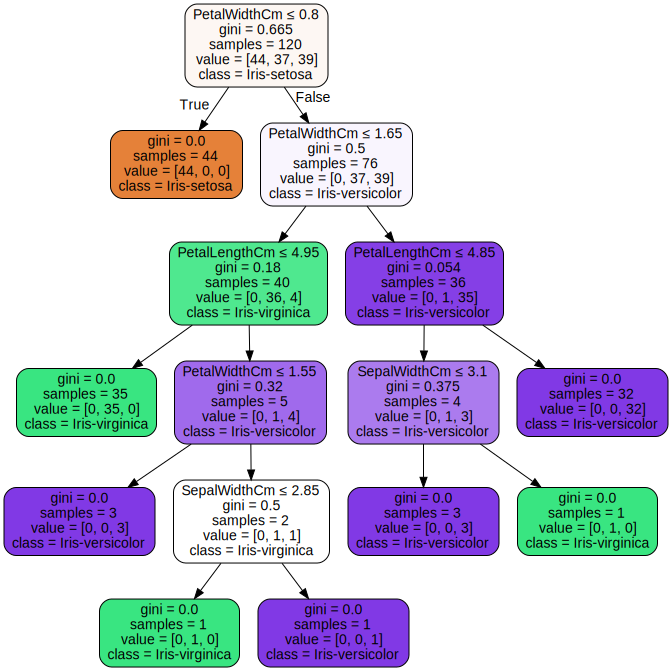

In [22]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(model_tree, out_file=None, 
                      feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                      class_names=['Iris-setosa','Iris-virginica', 'Iris-versicolor'],
                      filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Lets create our Final Decision Tree model

In [23]:
final_model = DecisionTreeClassifier(max_depth=20)

## fitting it to entire dataset
final_model.fit(X, y)

print("Decision Tree Classifier created")

Decision Tree Classifier created
